### Imports

In [62]:
# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# additional
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

### Import Dataset

In [64]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


In [66]:
df = pd.read_csv("data.csv")
print('df Shape:', df.shape)
df.head()

df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


### Data Preparation

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define numerical and categorical features
numerical_features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 
                      'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 
                      'SupportTicketsPerMonth', 'WatchlistSize']

categorical_features = ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 
                        'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 
                        'ParentalControl', 'SubtitlesEnabled']

# Preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformations into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the original train_df into training and validation sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])

# Split features and target in the train and validation data
X_train = train_df.drop(['Churn', 'CustomerID'], axis=1)
y_train = train_df['Churn']
X_test = test_df.drop(['Churn', 'CustomerID'], axis=1)
y_test = test_df['Churn']

# Apply transformations to train data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply the same transformations to the validation data
X_test_preprocessed = preprocessor.transform(X_test)

# Convert back to DataFrame for better understanding
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)

### Model 001 - Logistic Regression Model

In [72]:
# create the model
logregmodel = LogisticRegression()

In [74]:
# train the model - using .fit method
logregmodel = LogisticRegression()
logregmodel.fit(X_train_preprocessed_df, y_train)

LogisticRegression()

In [76]:
# predict - using .predict method
logreg_predict=logregmodel.predict(X_test_preprocessed_df)

In [78]:
# evaluation
# use the accuracy_score method
accuracy_001 = round(metrics.accuracy_score(y_test,logreg_predict)*100,2)
precision_001 = round(metrics.precision_score(y_test,logreg_predict)*100,2)
recall_001 = round(metrics.recall_score(y_test,logreg_predict)*100,2)
f1_001 = round(metrics.f1_score(y_test,logreg_predict)*100,2)

print(f'Accuracy: {accuracy_001}\nPrecision: {precision_001}\nRecall: {recall_001}\nF1: {f1_001}')

Accuracy: 82.48
Precision: 58.06
Recall: 11.98
F1: 19.87


In [80]:
# evaluation. confusion matrix
ConfusionMatrix_logreg = confusion_matrix(y_test, logreg_predict)
print(ConfusionMatrix_logreg)

[[39156   765]
 [ 7778  1059]]


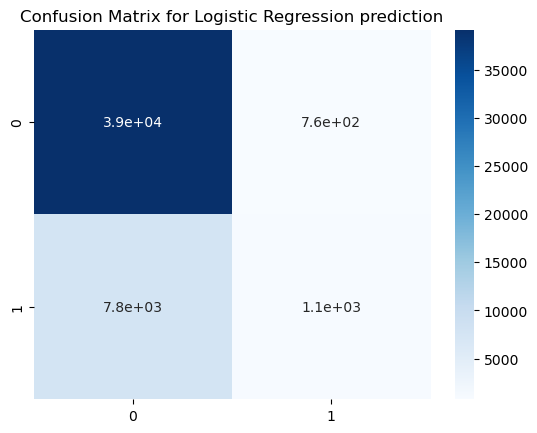

In [82]:
# confusion matrix
ConfusionMatrix_logreg = confusion_matrix(y_test, logreg_predict)
matrix_logreg=sns.heatmap(ConfusionMatrix_logreg,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression prediction')
plt.show(matrix_logreg)
plt.show()

### Model 002 - K-Nearest Neighbor

In [84]:
# create the model
knnmodel = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [86]:
# train the model, using .fit method
knnmodel.fit(X_train_preprocessed_df,y_train)

KNeighborsClassifier()

In [88]:
# predict
knn_predict=knnmodel.predict(X_test_preprocessed_df)

In [92]:
# evaluation
accuracy_002 = round(metrics.accuracy_score(y_test,knn_predict)*100,2)
precision_002 = round(metrics.precision_score(y_test,knn_predict)*100,2)
recall_002 = round(metrics.recall_score(y_test,knn_predict)*100,2)
f1_002 = round(metrics.f1_score(y_test,knn_predict)*100,2)

print(f'Accuracy: {accuracy_002}\nPrecision: {precision_002}\nRecall: {recall_002}\nF1: {f1_002}')

Accuracy: 80.01
Precision: 37.22
Recall: 15.03
F1: 21.41


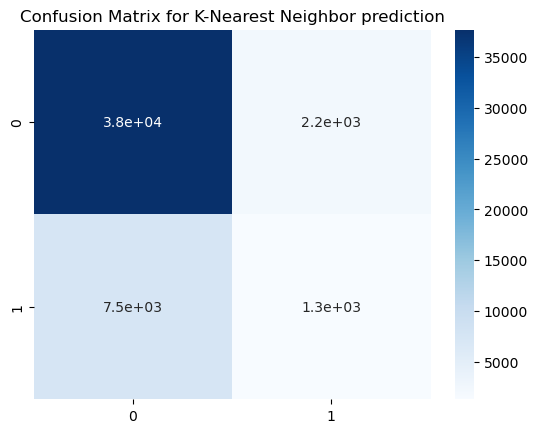

In [94]:
# confusion matrix
ConfusionMatrix_knn = confusion_matrix(y_test, knn_predict)
matrix_knn=sns.heatmap(ConfusionMatrix_knn,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for K-Nearest Neighbor prediction')
plt.show(matrix_knn)
plt.show()

### Model 003 - Random Forest Classifier Model

In [96]:
# create the model
rfmodel = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=1)

In [98]:
# train the model using .fit method
rfmodel.fit(X_train_preprocessed_df,y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [99]:
# predictions
rf_predict=rfmodel.predict(X_test_preprocessed_df)

In [100]:
# evaluation
accuracy_003 = round(metrics.accuracy_score(y_test,rf_predict)*100,2)
precision_003 = round(metrics.precision_score(y_test,rf_predict)*100,2)
recall_003 = round(metrics.recall_score(y_test,rf_predict)*100,2)
f1_003 = round(metrics.f1_score(y_test,rf_predict)*100,2)

print(f'Accuracy: {accuracy_003}\nPrecision: {precision_003}\nRecall: {recall_003}\nF1: {f1_003}')

Accuracy: 82.21
Precision: 57.54
Recall: 6.95
F1: 12.4


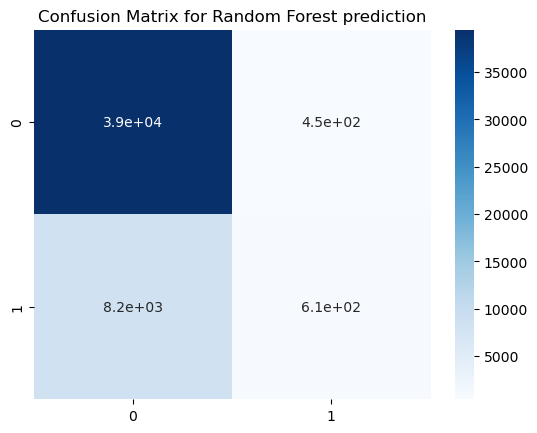

In [101]:
# confusion matrix
ConfusionMatrix_rf = confusion_matrix(y_test, rf_predict)
matrix_rf=sns.heatmap(ConfusionMatrix_rf,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest prediction')
plt.show(matrix_rf)
plt.show()

### Hyperparam tuning - Model 001 - LogReg

In [13]:
# With GridSearchCV

In [102]:
# create the model
logreg = logregmodel
# Define the hyperparameter grid to search through
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5)

In [103]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train_preprocessed_df, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [104]:
# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [105]:
# Refit the Model with Best Parameters
logreg_best = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver='liblinear')
logreg_best.fit(X_train_preprocessed_df, y_train)

LogisticRegression(C=1, solver='liblinear')

In [106]:
# Predict using the best model
logreg_best_predict = logreg_best.predict(X_test_preprocessed_df)

In [107]:
# Evaluate the model
accuracy_ht_001 = round(metrics.accuracy_score(y_test, logreg_best_predict) * 100, 2)
precision_ht_001 = round(metrics.precision_score(y_test, logreg_best_predict) * 100, 2)
recall_ht_001 = round(metrics.recall_score(y_test, logreg_best_predict) * 100, 2)
f1_ht_001 = round(metrics.f1_score(y_test, logreg_best_predict) * 100, 2)

print(f'Best Accuracy: {accuracy_ht_001}\nBest Precision: {precision_ht_001}\nBest Recall: {recall_ht_001}\nBest F1: {f1_ht_001}')

Best Accuracy: 82.48
Best Precision: 58.03
Best Recall: 11.98
Best F1: 19.86


### SMOTE for Oversampling - Model 001

In [118]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed_df, y_train)

# Train the model on the balanced data
logreg_smote = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver='liblinear')
logreg_smote.fit(X_train_smote, y_train_smote)

# Predict using the model trained with SMOTE
logreg_smote_predict = logreg_smote.predict(X_test_preprocessed_df)

# Evaluate the SMOTE model
accuracy_smote_logreg = round(metrics.accuracy_score(y_test, logreg_smote_predict) * 100, 2)
precision_smote_logreg = round(metrics.precision_score(y_test, logreg_smote_predict) * 100, 2)
recall_smote_logreg = round(metrics.recall_score(y_test, logreg_smote_predict) * 100, 2)
f1_smote_logreg = round(metrics.f1_score(y_test, logreg_smote_predict) * 100, 2)

print(f'SMOTE Accuracy: {accuracy_smote_logreg}\nSMOTE Precision: {precision_smote_logreg}\nSMOTE Recall: {recall_smote_logreg}\nSMOTE F1: {f1_smote_logreg}')

SMOTE Accuracy: 68.25
SMOTE Precision: 32.42
SMOTE Recall: 69.33
SMOTE F1: 44.18


### Threshold - Model 001

In [124]:
# Get predicted probabilities
logreg_smote_probs = logreg_smote.predict_proba(X_test_preprocessed_df)[:, 1]

# Find the best threshold
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [metrics.f1_score(y_test, logreg_smote_probs > t) for t in thresholds]

best_threshold_001 = thresholds[np.argmax(f1_scores)]
print(f'Best threshold: {best_threshold_001}')

# Predict with the best threshold
logreg_smote_predict_best_threshold = (logreg_smote_probs > best_threshold_001).astype(int)

# Evaluate the model with the best threshold
accuracy_001_best = round(metrics.accuracy_score(y_test, logreg_smote_predict_best_threshold) * 100, 2)
precision_001_best = round(metrics.precision_score(y_test, logreg_smote_predict_best_threshold) * 100, 2)
recall_001_best = round(metrics.recall_score(y_test, logreg_smote_predict_best_threshold) * 100, 2)
f1_001_best = round(metrics.f1_score(y_test, logreg_smote_predict_best_threshold) * 100, 2)

print(f'Threshold SMOTE Accuracy: {accuracy_001_best}\nThreshold SMOTE Precision: {precision_001_best}\nThreshold SMOTE Recall: {recall_001_best}\nThreshold SMOTE F1: {f1_001_best}')

Best threshold: 0.5499999999999998
Threshold SMOTE Accuracy: 72.16
Threshold SMOTE Precision: 34.94
Threshold SMOTE Recall: 62.19
Threshold SMOTE F1: 44.74


### Hyperparam tyning - Model 002

In [126]:
# Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, scoring='accuracy', cv=5)
grid_search_knn.fit(X_train_preprocessed_df, y_train)

best_params_knn = grid_search_knn.best_params_
print(f'Best parameters for KNN: {best_params_knn}')

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}


In [127]:
# Refit the KNN model with the best parameters
knn_best = KNeighborsClassifier(**best_params_knn)
knn_best.fit(X_train_preprocessed_df, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [128]:
# Predict with the best KNN model
knn_best_predict = knn_best.predict(X_test_preprocessed_df)

In [129]:
# Evaluate the best KNN model
accuracy_knn_best = round(metrics.accuracy_score(y_test, knn_best_predict) * 100, 2)
precision_knn_best = round(metrics.precision_score(y_test, knn_best_predict) * 100, 2)
recall_knn_best = round(metrics.recall_score(y_test, knn_best_predict) * 100, 2)
f1_knn_best = round(metrics.f1_score(y_test, knn_best_predict) * 100, 2)

print(f'KNN Best Accuracy: {accuracy_knn_best}\nKNN Best Precision: {precision_knn_best}\nKNN Best Recall: {recall_knn_best}\nKNN Best F1: {f1_knn_best}')

KNN Best Accuracy: 80.78
KNN Best Precision: 40.32
KNN Best Recall: 12.61
KNN Best F1: 19.21


### SMOTE - Model 002

In [130]:
# SMOTE for KNN
smote = SMOTE(random_state=42)
X_train_smote_knn, y_train_smote_knn = smote.fit_resample(X_train_preprocessed_df, y_train)

In [131]:
knn_smote = KNeighborsClassifier(**best_params_knn)
knn_smote.fit(X_train_smote_knn, y_train_smote_knn)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [132]:
knn_smote_predict = knn_smote.predict(X_test_preprocessed_df)

In [133]:
accuracy_knn_smote = round(metrics.accuracy_score(y_test, knn_smote_predict) * 100, 2)
precision_knn_smote = round(metrics.precision_score(y_test, knn_smote_predict) * 100, 2)
recall_knn_smote = round(metrics.recall_score(y_test, knn_smote_predict) * 100, 2)
f1_knn_smote = round(metrics.f1_score(y_test, knn_smote_predict) * 100, 2)

print(f'Accuracy: {accuracy_knn_smote}\nPrecision: {precision_knn_smote}\nRecall: {recall_knn_smote}\nF1: {f1_knn_smote}')

Accuracy: 58.82
Precision: 24.91
Recall: 63.14
F1: 35.72


### Threshold - Model 002

In [148]:
# Get predicted probabilities
knn_smote_probs = knn_smote.predict_proba(X_test_preprocessed_df)[:, 1]

# Find the best threshold
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y_test, knn_smote_probs > t) for t in thresholds]

best_threshold_002 = thresholds[np.argmax(f1_scores)]
print(f'Best threshold: {best_threshold_002}')

# Predict with the best threshold
knn_smote_predict_best_threshold = (knn_smote_probs > best_threshold_002).astype(int)

# Evaluate the model with the best threshold
accuracy_002_best = round(accuracy_score(y_test, knn_smote_predict_best_threshold) * 100, 2)
precision_002_best = round(precision_score(y_test, knn_smote_predict_best_threshold) * 100, 2)
recall_002_best = round(recall_score(y_test, knn_smote_predict_best_threshold) * 100, 2)
f1_002_best = round(f1_score(y_test, knn_smote_predict_best_threshold) * 100, 2)

print(f'Threshold Accuracy: {accuracy_002_best}\nThreshold Precision: {precision_002_best}\nThreshold Recall: {recall_002_best}\nThreshold F1: {f1_002_best}')



Best threshold: 0.5299999999999998
Threshold Accuracy: 59.02
Threshold Precision: 24.97
Threshold Recall: 62.93
Threshold F1: 35.76


### Hyperparam tyning - Model 003

In [149]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=1), param_grid=param_grid_rf, scoring='accuracy', cv=5)
grid_search_rf.fit(X_train_preprocessed_df, y_train)

best_params_rf = grid_search_rf.best_params_
print(f'Best parameters for Random Forest: {best_params_rf}')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

Best parameters for Random Forest: {'class_weight': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [150]:
# Refit the Random Forest model with the best parameters
rf_best = RandomForestClassifier(**best_params_rf, random_state=1)
rf_best.fit(X_train_preprocessed_df, y_train)

RandomForestClassifier(n_estimators=200, random_state=1)

In [151]:
# Predict with the best Random Forest model
rf_best_predict = rf_best.predict(X_test_preprocessed_df)

In [153]:
# Evaluate the best Random Forest model
accuracy_rf_best = round(metrics.accuracy_score(y_test, rf_best_predict) * 100, 2)
precision_rf_best = round(metrics.precision_score(y_test, rf_best_predict) * 100, 2)
recall_rf_best = round(metrics.recall_score(y_test, rf_best_predict) * 100, 2)
f1_rf_best = round(metrics.f1_score(y_test, rf_best_predict) * 100, 2)

print(f'Random Forest Best Accuracy: {accuracy_rf_best}\nRandom Forest Best Precision: {precision_rf_best}\nRandom Forest Best Recall: {recall_rf_best}\nRandom Forest Best F1: {f1_rf_best}')

Random Forest Best Accuracy: 82.26
Random Forest Best Precision: 59.06
Random Forest Best Recall: 6.94
Random Forest Best F1: 12.42


### SMOTE - Model 003

In [154]:
# SMOTE for Random Forest
X_train_smote_rf, y_train_smote_rf = smote.fit_resample(X_train_preprocessed_df, y_train)

In [155]:
rf_smote = RandomForestClassifier(**best_params_rf, random_state=1)
rf_smote.fit(X_train_smote_rf, y_train_smote_rf)

RandomForestClassifier(n_estimators=200, random_state=1)

In [156]:
rf_smote_predict = rf_smote.predict(X_test_preprocessed_df)

In [157]:
accuracy_rf_smote = round(metrics.accuracy_score(y_test, rf_smote_predict) * 100, 2)
precision_rf_smote = round(metrics.precision_score(y_test, rf_smote_predict) * 100, 2)
recall_rf_smote = round(metrics.recall_score(y_test, rf_smote_predict) * 100, 2)
f1_rf_smote = round(metrics.f1_score(y_test, rf_smote_predict) * 100, 2)

print(f'SMOTE Random Forest Accuracy: {accuracy_rf_smote}\nSMOTE Random Forest Precision: {precision_rf_smote}\nSMOTE Random Forest Recall: {recall_rf_smote}\nSMOTE Random Forest F1: {f1_rf_smote}')

SMOTE Random Forest Accuracy: 81.31
SMOTE Random Forest Precision: 46.53
SMOTE Random Forest Recall: 20.91
SMOTE Random Forest F1: 28.85


### Threshold - Model 003

In [159]:
# Get predicted probabilities
rf_smote_probs = rf_smote.predict_proba(X_test_preprocessed_df)[:, 1]

# Find the best threshold
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [metrics.f1_score(y_test, rf_smote_probs > t) for t in thresholds]

best_threshold_003 = thresholds[np.argmax(f1_scores)]
print(f'Best threshold: {best_threshold_003}')

# Predict with the best threshold
rf_smote_predict_best_threshold = (rf_smote_probs > best_threshold_003).astype(int)

# Evaluate the model with the best threshold
accuracy_003_best = round(metrics.accuracy_score(y_test, rf_smote_predict_best_threshold) * 100, 2)
precision_003_best = round(metrics.precision_score(y_test, rf_smote_predict_best_threshold) * 100, 2)
recall_003_best = round(metrics.recall_score(y_test, rf_smote_predict_best_threshold) * 100, 2)
f1_003_best = round(metrics.f1_score(y_test, rf_smote_predict_best_threshold) * 100, 2)

print(f'Threshold Accuracy: {accuracy_003_best}\nThreshold Precision: {precision_003_best}\nThreshold Recall: {recall_003_best}\nThreshold F1: {f1_003_best}')

Best threshold: 0.3199999999999999
Threshold Accuracy: 70.78
Threshold Precision: 33.47
Threshold Recall: 61.99
Threshold F1: 43.47


### Results Overview

In [163]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Best Threshold'])

def append_results(model_name, accuracy, precision, recall, f1, threshold=None):
    global results_df
    result = pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Best Threshold': threshold
    }])
    results_df = pd.concat([results_df, result], ignore_index=True)


append_results('LogReg Simple',accuracy_001, precision_001, recall_001, f1_001)
append_results('SMOTE LogReg',accuracy_smote_logreg, precision_smote_logreg, recall_smote_logreg, f1_smote_logreg)
append_results('SMOTE LogReg + Threshold',accuracy_001_best, precision_001_best, recall_001_best, f1_001_best, round(best_threshold_001))

append_results('KNN Simple',accuracy_002, precision_002, recall_002, f1_002)
append_results('SMOTE KNN',accuracy_knn_smote, precision_knn_smote, recall_knn_smote, f1_knn_smote)
append_results('SMOTE KNN + Threshold',accuracy_002_best, precision_002_best, recall_002_best, f1_002_best, round(best_threshold_002))

append_results('Random Forest Simple',accuracy_003, precision_003, recall_003, f1_003)
append_results('SMOTE Random Forest',accuracy_rf_smote, precision_rf_smote,recall_rf_smote, f1_rf_smote)
append_results('SMOTE Random Forest + Threshold',accuracy_003_best, precision_003_best, recall_003_best, f1_003_best, round(best_threshold_003))



/var/folders/78/lstcwc951zs14wpz1_zzh_cc0000gn/T/ipykernel_39144/1994348155.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, result], ignore_index=True)


In [165]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Best Threshold
0,LogReg Simple,82.48,58.06,11.98,19.87,None
1,SMOTE LogReg,68.25,32.42,69.33,44.18,None
2,SMOTE LogReg + Threshold,72.16,34.94,62.19,44.74,1
3,KNN Simple,80.01,37.22,15.03,21.41,None
4,SMOTE KNN,58.82,24.91,63.14,35.72,None
5,SMOTE KNN + Threshold,59.02,24.97,62.93,35.76,1
6,Random Forest Simple,82.21,57.54,6.95,12.40,None
7,SMOTE Random Forest,81.31,46.53,20.91,28.85,None
8,SMOTE Random Forest + Threshold,70.78,33.47,61.99,43.47,0


**Conclusions:** <br>
**Logistic Regression** with SMOTE significantly improves recall but reduces precision and accuracy compared to the simple logistic regression. Threshold tuning with SMOTE slightly improves the F1 score. <br>
**KNN** with SMOTE greatly improves recall but significantly reduces accuracy. Threshold tuning with SMOTE shows only a slight improvement in the F1 score.<br>
**Random Forest** with SMOTE increases recall but decreases precision and accuracy. Threshold tuning with SMOTE significantly improves the F1 score by balancing precision and recall better.<br><br>
**Overall:**
- SMOTE generally improves recall across all models but often at the cost of reduced precision and accuracy. <br>
- Threshold tuning after applying SMOTE can help balance precision and recall, often resulting in better F1 scores. <br>
- **Logistic Regression with SMOTE and Threshold Tuning** achieved the highest F1 score (44.74) among all models and methods. <br>
- Simple models (without SMOTE) tend to have higher accuracy but lower recall, indicating they may be less effective at identifying the minority class.